<a href="https://colab.research.google.com/github/Ayanlola2002/DATA-SCIENCE-PROJECTS/blob/master/Task5_NeedEnergyAPI_Puma_Rhodesville_omdena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import zipfile

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import os

In [ ]:
## Functions to use

def read_data(datafile, dateCol):
    ''' Read the excel file'''
    df = pd.read_excel(datafile, index_col= dateCol, parse_dates=True)
    return df
    
def info_data(datafile, info = False, head = True, shape = True):
    ''' Look at the info of the data'''
    
    if not isinstance(datafile, pd.DataFrame):
        df = read_data(datafile)
    else:
        df = datafile
    
    ## Information of data
    if info:
        df.info()
        
    print('--------------------------------------------------------------------')
    print('First rows')
    # Show first rows
    if head:
        print(df.head())
        
    print('--------------------------------------------------------------------')
    print('Dimension of the data')
    ## Dimension of data
    if shape:
        print(f'This data has {df.shape[0]} rows and {df.shape[1]} variables') 
        
        
def find_unique(df, col):
    ''' Find the unique values of a columns'''
    return df[col].nunique()

### Look at the statistical description of data
def describe(df, col = None):
    ''' Give the statistic summary'''
    
    ## Summary statistic
    if col is not None:
        stat = df[col].describe()
    else:
        stat = df.describe()

    ## Change the name of the 50% index to median
    idx = stat.index.tolist()
    idx[5] = 'median'
    stat.index = idx
    return stat

def missing_val(data):
    ''' Find the percentage of missing values
    on each column of a dataframe'''
    
    ## percentage of missing values
    n = data.isnull().sum().sort_values(ascending=False)/ len(data) * 100
    return n
  
def boxHist(df, col):
    ''' Create the boxplot and histogram'''
    ## Setup for ploting two charts one over the other
    fig, ax = plt.subplots(2, 1, figsize = (10,6))
    
    ## First a box plot
    df.dropna().boxplot(col, ax = ax[0], vert=False, return_type='dict')
    
    ## Plot the histogram
    temp = df[col].values
    ax[1].hist(temp, bins = 75)
    plt.xlabel(col)
    return [col]

def valCount(data, col, perc = False):
    ''' calculate the proportion in fraction or percentage'''
    if not perc:
      return data[col].value_counts()
    else:
      return data[col].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'    
    
def make_chart_histogram(data, col = None, subplots=True, layout = None, figsize = None, sharex = False, bins = None):
    ''' Create histogram from numerical variable'''
    
    if col is not None:
        return df[col].hist(bins = bins)
    else:
        return data.plot.hist(subplots=True, layout = layout, figsize = figsize, sharex=False, bins = bins)
    
    
def plotCounts(data, col, kind = 'barh', perc = False):
    ''' Plot the proportion of a categorical variables'''
    if not perc:
        return data[col].value_counts().plot(kind = kind)
    else:
        return data[col].value_counts(normalize = True).mul(100).round(2).plot(kind = kind)

    
def convert_date(df, column_name):
    return pd.to_datetime(df[column_name])

def convertTime(df, column_name):
    return pd.to_timedelta(df[column_name])

def date_cols(data, col):
    ''' Create year, month, month name and day from a datetime column'''
    #data[col] = convert(data, col)
    
    data['Year'] = pd.DatetimeIndex(data[col]).year
    data['Month'] = pd.DatetimeIndex(data[col]).month
    data['Day'] = pd.DatetimeIndex(data[col]).day
    data['weekday'] = pd.DatetimeIndex(data[col]).weekday
    data['weekday_name'] = pd.DatetimeIndex(data[col]).day_name()
    data['Hour'] = pd.DatetimeIndex(data[col]).hour

    return data    


### plots groupbyfunction
def plots(data, col1 , col2, func, title, t = 'line'):
    ''' Plotting plots from groupby'''
    
    data.groupby(col1)[col2].agg(func).plot(kind = t)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(title)

def groupDat(data, col1 , col2, func):
    ''' Create groupby'''
    
    return data.groupby(col1)[col2].agg(func)     


def create_season(row):
    ''' create season'''
    if row['Month'] in (1, 2, 12):
        return "Winter"
    elif row['Month'] in (3, 4, 5):
        return "Spring"
    elif row['Month'] in (6, 7, 8):
        return "Summer"
    elif row['Month'] in (9, 10, 11):
        return "Fall"
    else:
        return "Other"


def DataandResampling(data, col_date, target, resamplingperiod, label):
    ''' Plot the whole data vs. resampling mean'''
    
    if data[col_date].dtypes == 'datetime64':
        data[col_date] = data[col_date]
    else:
        data[col_date] = pd.to_datetime(data[col_date])

    ## Set the index to date 
    data = data.set_index(col_date) 
        
    ## plot figure    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(data[target], marker='.', linestyle='-', linewidth=0.5, label=label)
    ax.plot(data[target].resample(resamplingperiod).mean(), marker='o', markersize=6, linestyle='-', label= resamplingperiod + 'ly' + ' Mean Resample')
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_ylabel(target)
    ax.legend(loc = 'upper right')


def YearlyDailyAgg(data, col_date, target, period):
    ''' Aggregate target by year, season, week using date column'''
    
    if data[col_date].dtypes == 'datetime64':
        data[col_date] = data[col_date]
    else:
        data[col_date] = convert_date(data, col_date)
        
    ## plot figure    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 20))
    fig.subplots_adjust(hspace=0.6, wspace=0.4)

    
    ## Create time features
    date_cols(data, col_date)
    
    data['weekend'] = np.where((data['weekday'] == 5) | (data['weekday'] == 6), 1 ,0) 
    data['season'] = data.apply(create_season, axis = 1)
    

    data.groupby(period)[target].mean().plot.bar(ax = ax1)
    ax1.set_xlabel(period)
    ax1.set_ylabel(target + ' avg')
    ax1.set_title(f'{period} {target} avg')

    ### Mean, median and std of each year
    data.groupby(period).agg({target: ['mean', 'median', 'std']}).plot.bar(ax = ax2)
    ax2.set_title(target +' mean/median/std')
    ax2.set_ylabel(target + ' avg')
    ax2.legend(loc = "best", labels = ['Mean', 'Median', 'Std']);

    ### Consumption by HOUR
    data.groupby(['Hour', period])[target].mean().unstack().plot(style=[':', '--', '-'], ax = ax3)
    ax3.set_title(f'{period} {target} avg by HOUR')
    ax3.set_ylabel(target + ' avg')
    ax3.set_xlim((0,25))

        
def MonthlyWeeklyAgg(data, col_date, target, period):
    ''' Aggregate by month, week or day'''
    
    if data[col_date].dtypes == 'datetime64':
        data[col_date] = data[col_date]
    else:
        data[col_date] = convert_date(data, col_date)
        
    ## plot figure    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 20))
    fig.subplots_adjust(hspace=0.6, wspace=0.4)

            
    ## Create time features
    date_cols(data, col_date)


    order_month = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

    order_week = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
    
    
    if period == 'Month':
        data["Month_name"] = data[period].map({1:"JAN", 2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",
                                            7:"JUL",8:"AUG",9:"SEP",10:"OCT",11:"NOV",12:"DEC"
                                               })
        data.groupby('Month_name')[target].mean().reindex(index = order_month).plot.bar(ax = ax1)
        
        ### Mean, median and std of each year
        data.groupby('Month_name').agg({target: ['mean', 'median', 'std']}).reindex(index = order_month).plot(style=[':', '--', '-'],
                                                                                                            ax = ax2)
        
        ### Period consumption by HOUR
        df_hour = data.groupby(['Hour', 'Month_name'])[target].mean().unstack()
        df_hour = df_hour[order_month]
        df_hour.columns.name = None
        sns.heatmap(df_hour, cmap="YlGnBu", ax = ax3)
        
    elif period == 'weekday':
        data['weekday_name'] = data[period].map({0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
        data.groupby('weekday_name')[target].mean().reindex(index = order_week).plot.bar(ax = ax1)

        ### Mean, median and std of each week
        data.groupby('weekday_name').agg({target: ['mean', 'median', 'std']}).reindex(index = order_week).plot(style=[':', '--', '-'],
                                                                                                            ax = ax2)
        
        ### Period EA by HOUR
        data.groupby(['Hour', 'weekday_name'])[target].mean().unstack().plot(style=[':', '--', '-'], ax = ax3)
        ax3.set_title(f'{period} {target} avg')
        ax3.set_ylabel(target + ' avg')
        
    else:
        data.groupby(period)[target].mean().plot(ax = ax1)

        ### Mean, median and std of each year
        data.groupby(period).agg({target: ['mean', 'median', 'std']}).plot(style=[':', '--', '-'], ax = ax2)

    
        ### Period consumption by HOUR
        df_hour = data.groupby(['Hour', period])[target].mean().unstack()
        df_hour.columns.name = None
        sns.heatmap(df_hour, cmap="YlGnBu", ax = ax3)
        
    ax1.set_xlabel(period)
    ax1.set_ylabel(target + ' avg')
    ax1.set_title(f'{period} {target} avg') 
    
    ax2.set_title(target + ' mean/median/std')
    ax2.set_xlabel('')
    ax2.set_ylabel(target + ' avg')
    ax2.legend(loc = "best", labels = ['Mean', 'Median', 'Std'])


def TSAggregationEda(data, col_date, target, period):
    ''' Create time series EDA'''
   
    if period in ('Year', 'season', 'weekend'):
        YearlyDailyAgg(data, col_date, target, period)
    else:  
        MonthlyWeeklyAgg(data, col_date, target, period)

def heatmapGroupby(data, col_date, target, row , col, func):

    if data[col_date].dtypes == 'datetime64':
        data[col_date] = data[col_date]
    else:
        data[col_date] = convert_date(data, col_date)
    
    ## Create time features
    order_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    order_month = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    date_cols(data, col_date)
    data["Month_name"] = data[col].map({1:"JAN", 2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",
                                            7:"JUL",8:"AUG",9:"SEP",10:"OCT",11:"NOV",12:"DEC"})
    df_g = data.groupby([row, col])[target].agg(func).unstack()
    if col == 'weekday_name':
      df_g = df_g[order_week]
    else:
        df_g = df_g[order_month]
    df_g.columns.name = None
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_g, cmap="YlGnBu")
      

UPDATED ON 13/02

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zf = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/NeedEnergy/NeedEnergy API Data -20210212T225824Z-001.zip') # having First.csv zipped file.

In [ ]:
zipfile.ZipFile.namelist(zf)

['NeedEnergy API Data /47740 for Puma Rhodesville - 47803 is for Puma HQ.rtf',
 'NeedEnergy API Data /data_monthly_id_47740.csv',
 'NeedEnergy API Data /data_monthly_id_47803.csv',
 'NeedEnergy API Data /data_daily_id_47740.csv',
 'NeedEnergy API Data /data_daily_id_47803.csv',
 'NeedEnergy API Data /data_hourly_id_47740.csv',
 'NeedEnergy API Data /data_hourly_id_47803.csv',
 'NeedEnergy API Data /data_five_min_id_47740.csv',
 'NeedEnergy API Data /data_five_min_id_47803.csv',
 'NeedEnergy API Data /data_five_min_id_47803.xlsx',
 'NeedEnergy API Data /data_five_min_id_47740.xlsx']

In [ ]:
listfiles = zipfile.ZipFile.namelist(zf)

In [ ]:
listfiles[1], listfiles[3], listfiles[5], listfiles[-4]

('NeedEnergy API Data /data_monthly_id_47740.csv',
 'NeedEnergy API Data /data_daily_id_47740.csv',
 'NeedEnergy API Data /data_hourly_id_47740.csv',
 'NeedEnergy API Data /data_five_min_id_47740.csv')

In [ ]:
df_m_rhod = pd.read_csv(zf.open(listfiles[1]))
df_d_rhod = pd.read_csv(zf.open(listfiles[3]))
df_h_rhod = pd.read_csv(zf.open(listfiles[5]))
df_5min_rhod = pd.read_csv(zf.open(listfiles[-4]))

## EDA OF NeedEnergy API 5min for Puma Rhodesville

In [ ]:
df_5min_rhod.head(3)

,date,timestamp,consumption,solar,alwaysOn,gridImport,gridExport,selfConsumption,selfSufficiency,active,reactive,voltages,phaseVoltages,currentHarmonics,voltageHarmonics
0,2020-03-12 16:00:00,1584021600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[7.3, 0.2, 0.8, 4.1, 0.0, None, None, None, No...","[1.3, 0.2, 0.8, 0.8, 0.0, None, None, None, No...","[44.6, None, None]","[44.6, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
1,2020-03-12 16:05:00,1584021900000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[118.3, 1.0, 85.2, 20.8, 0.0, 0.0, 0.0, 0.0, 3...","[18.0, 1.3, 17.7, 4.2, 0.0, 0.0, 0.1, 0.0, 0.4...","[224.2, None, None]","[224.2, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
2,2020-03-12 16:10:00,1584022200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[85.7, 1.0, 52.6, 20.7, 0.0, 0.0, 0.0, 0.0, 2....","[15.6, 1.2, 14.4, 4.1, 0.0, 0.0, 0.0, 0.0, 0.4...","[223.9, None, None]","[223.9, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."


In [ ]:
info_data(df_5min_rhod, info = True, head = False, shape = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70067 entries, 0 to 70066
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              70067 non-null  object 
 1   timestamp         70067 non-null  int64  
 2   consumption       70067 non-null  float64
 3   solar             70067 non-null  float64
 4   alwaysOn          70067 non-null  float64
 5   gridImport        70067 non-null  float64
 6   gridExport        70067 non-null  float64
 7   selfConsumption   70067 non-null  float64
 8   selfSufficiency   70067 non-null  float64
 9   active            70067 non-null  object 
 10  reactive          70067 non-null  object 
 11  voltages          70067 non-null  object 
 12  phaseVoltages     70067 non-null  object 
 13  currentHarmonics  70067 non-null  object 
 14  voltageHarmonics  70067 non-null  object 
dtypes: float64(7), int64(1), object(7)
memory usage: 8.0+ MB
------------------------------

In [ ]:
df_5min_rhod.nunique()

date                70067
timestamp           70067
consumption         55845
solar               41662
alwaysOn              523
gridImport          50423
gridExport              2
selfConsumption         2
selfSufficiency      6636
active              69840
reactive            69989
voltages              555
phaseVoltages         555
currentHarmonics        1
voltageHarmonics        1
dtype: int64

In [ ]:
describe(df_5min_rhod)

,timestamp,consumption,solar,alwaysOn,gridImport,gridExport,selfConsumption,selfSufficiency
count,7.006700e+04,70067.000000,70067.000000,70067.000000,70067.00000,7.006700e+04,70067.000000,70067.000000
mean,1.599152e+12,144.450438,44.029926,447.412574,100.41999,3.568013e-07,98.181740,30.784089
std,7.855158e+09,49.975352,23.985970,282.085277,44.32482,1.888595e-05,13.361229,15.022428
min,1.584022e+12,0.000000,-65.220000,0.000000,0.00000,0.000000e+00,0.000000,0.000000
25%,1.592852e+12,117.548000,24.413500,281.604000,75.61700,0.000000e+00,100.000000,21.110000
median,1.598117e+12,140.080000,44.772000,362.556000,93.17800,0.000000e+00,100.000000,31.220000
75%,1.605923e+12,175.009500,55.591000,551.988000,122.48750,0.000000e+00,100.000000,39.140000
max,1.613054e+12,465.607000,410.872000,1508.004000,428.80200,1.000000e-03,100.000000,100.000000


The consumption go from 0 to 465 Wh with a mean of 144.45 Wh. Different from the data provided on the first place.

['consumption']

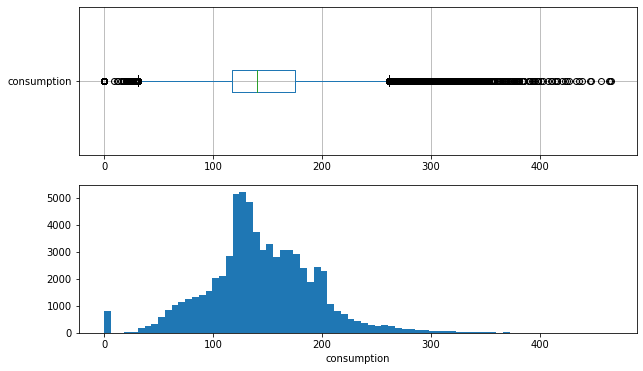

In [ ]:
boxHist(df_5min_rhod, 'consumption')

In [ ]:
## convert date to datetime and create date attribute
df_5min_rhod = date_cols(df_5min_rhod, 'date')

In [ ]:
print(f'This data is for {df_5min_rhod.Year.max() - df_5min_rhod.Year.min()} year')

This data is for 1 year


In [ ]:
valCount(df_5min_rhod, 'Month', perc = False)

7     8928
8     8876
6     8344
9     7263
1     6958
11    6858
12    6554
5     6463
4     3052
2     2634
10    2139
3     1998
Name: Month, dtype: int64

In [ ]:
valCount(df_5min_rhod, 'weekday_name', perc = False)

Tuesday      10457
Wednesday    10127
Saturday     10089
Sunday        9894
Friday        9869
Monday        9831
Thursday      9800
Name: weekday_name, dtype: int64

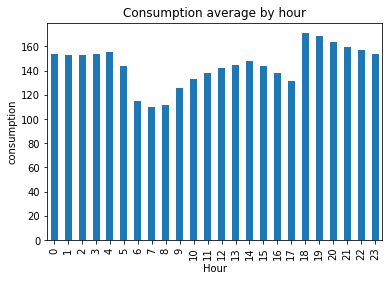

In [ ]:
## Average consumption by Hour
plots(df_5min_rhod, 'Hour' , 'consumption', np.mean, 'Consumption average by hour', t = 'bar')

High consumption during the night probably a manufactory company

In [ ]:
df_5min_rhod.columns

Index(['date', 'timestamp', 'consumption', 'solar', 'alwaysOn', 'gridImport',
       'gridExport', 'selfConsumption', 'selfSufficiency', 'active',
       'reactive', 'voltages', 'phaseVoltages', 'currentHarmonics',
       'voltageHarmonics', 'Year', 'Month', 'Day', 'weekday', 'weekday_name',
       'Hour'],
      dtype='object')

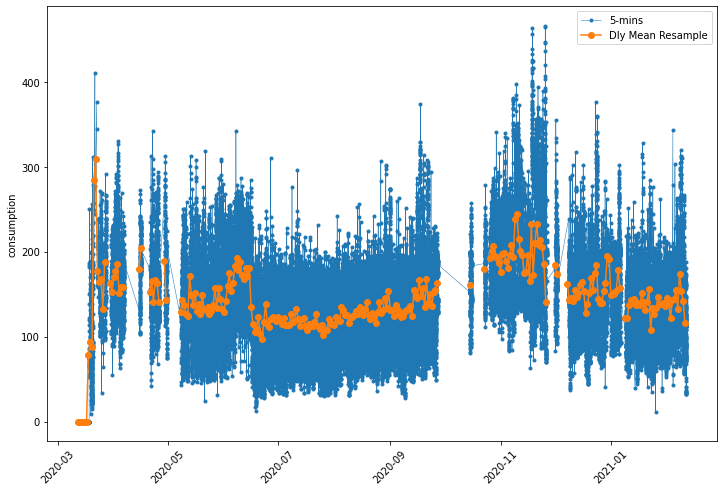

In [ ]:
DataandResampling(df_5min_rhod, 'date', 'consumption', 'D', '5-mins')

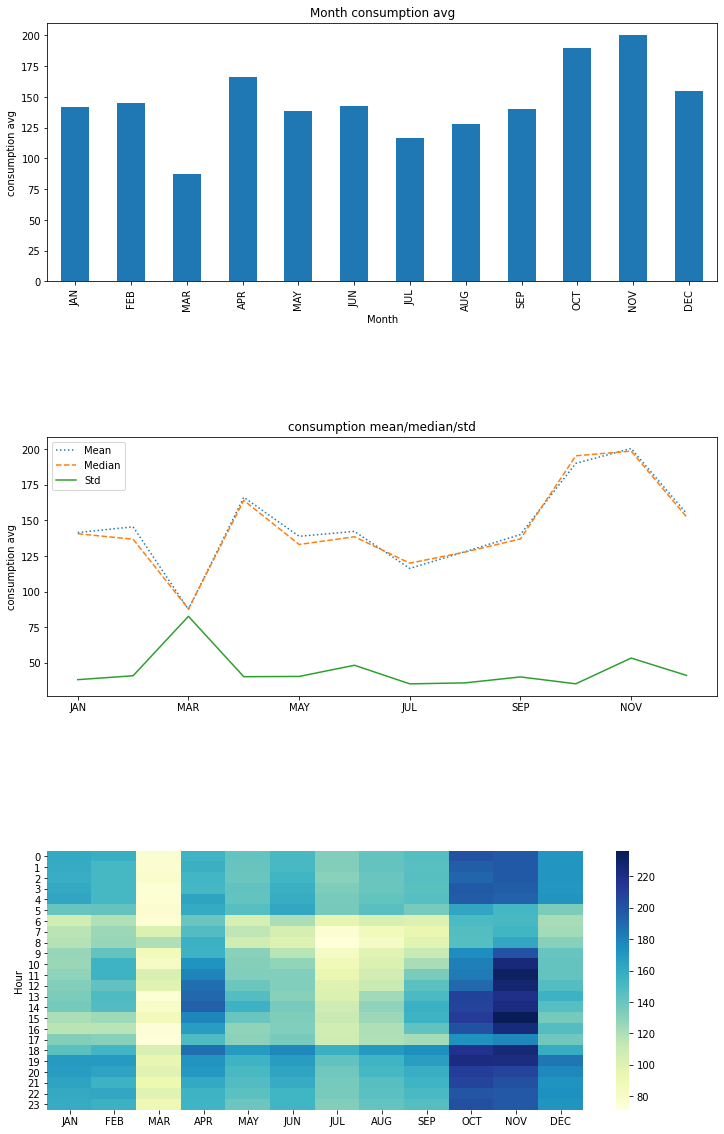

In [ ]:
## Month
TSAggregationEda(df_5min_rhod, 'date', 'consumption', 'Month')

High consumption on October and November

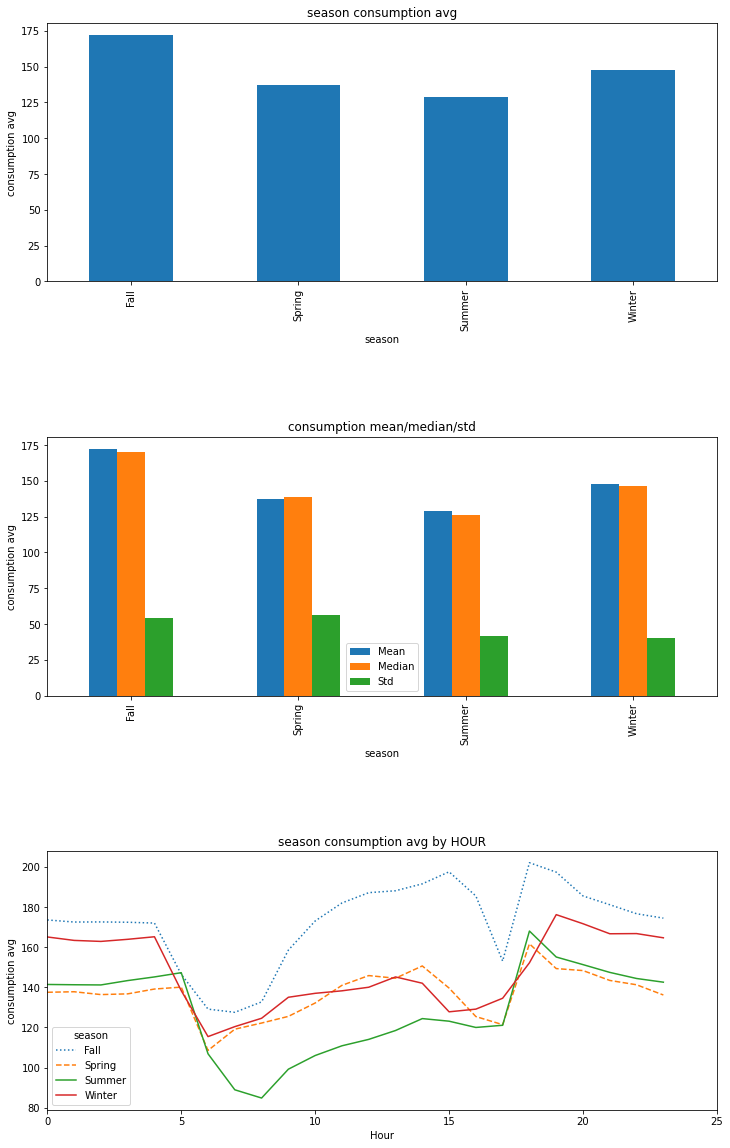

In [ ]:
## season
TSAggregationEda(df_5min_rhod, 'date', 'consumption', 'season')

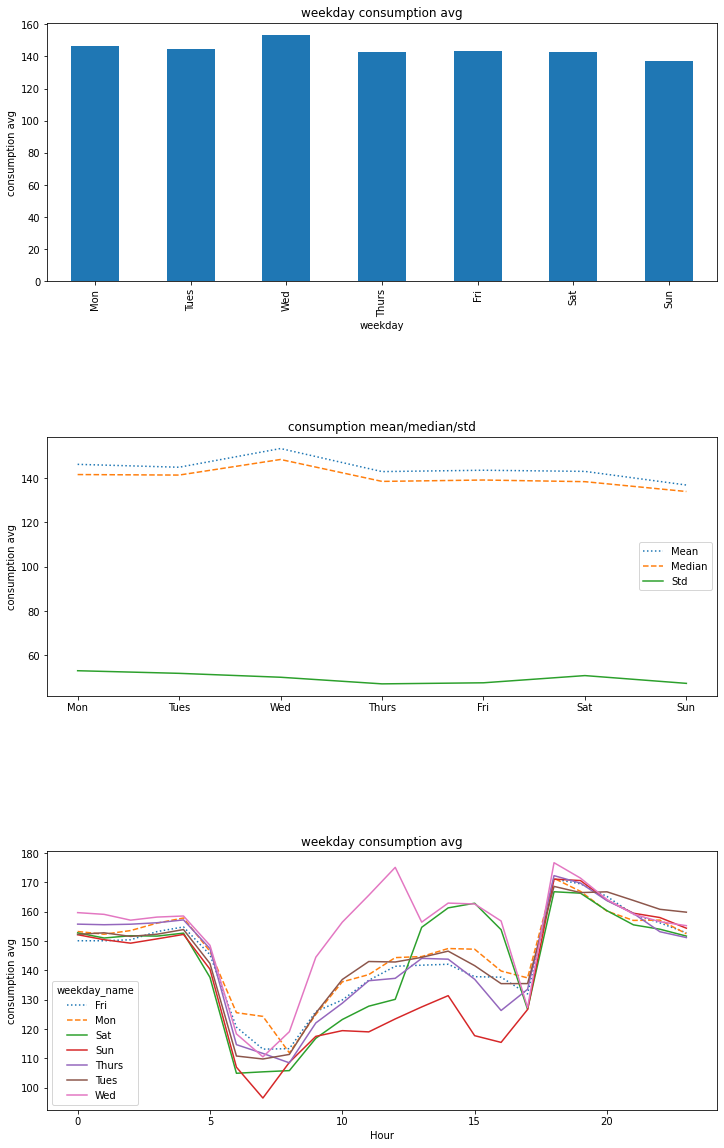

In [ ]:
## week
TSAggregationEda(df_5min_rhod, 'date', 'consumption', 'weekday')

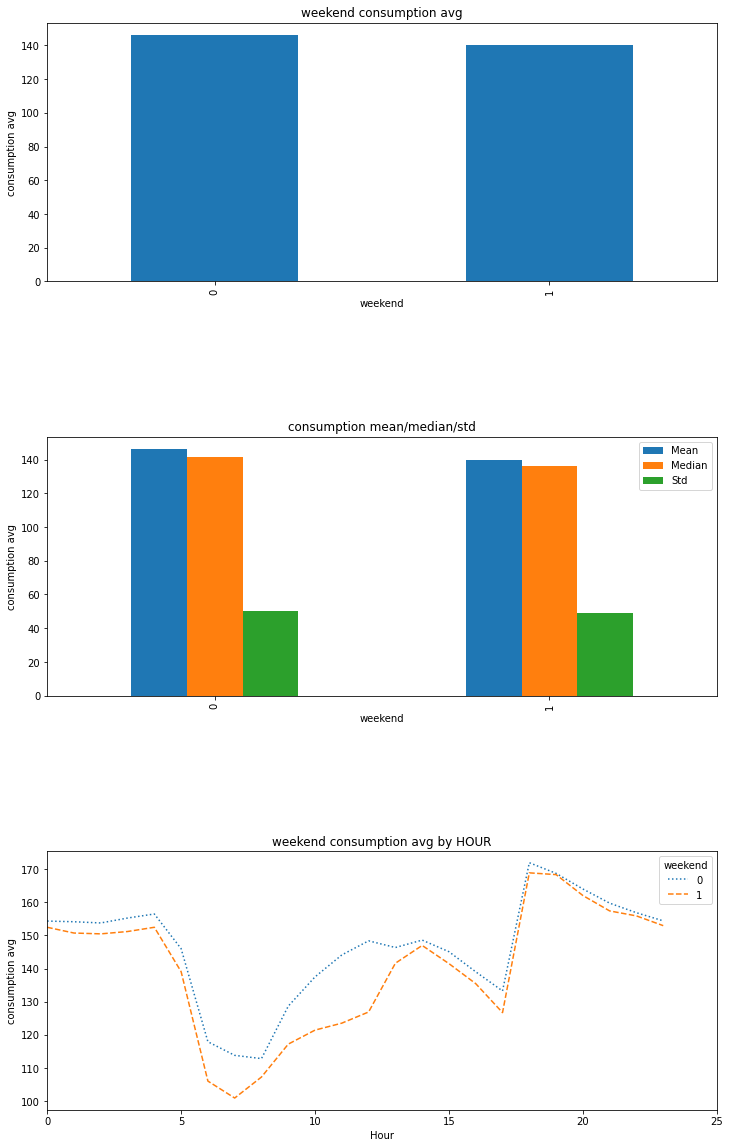

In [ ]:
## weekend
TSAggregationEda(df_5min_rhod, 'date', 'consumption', 'weekend')

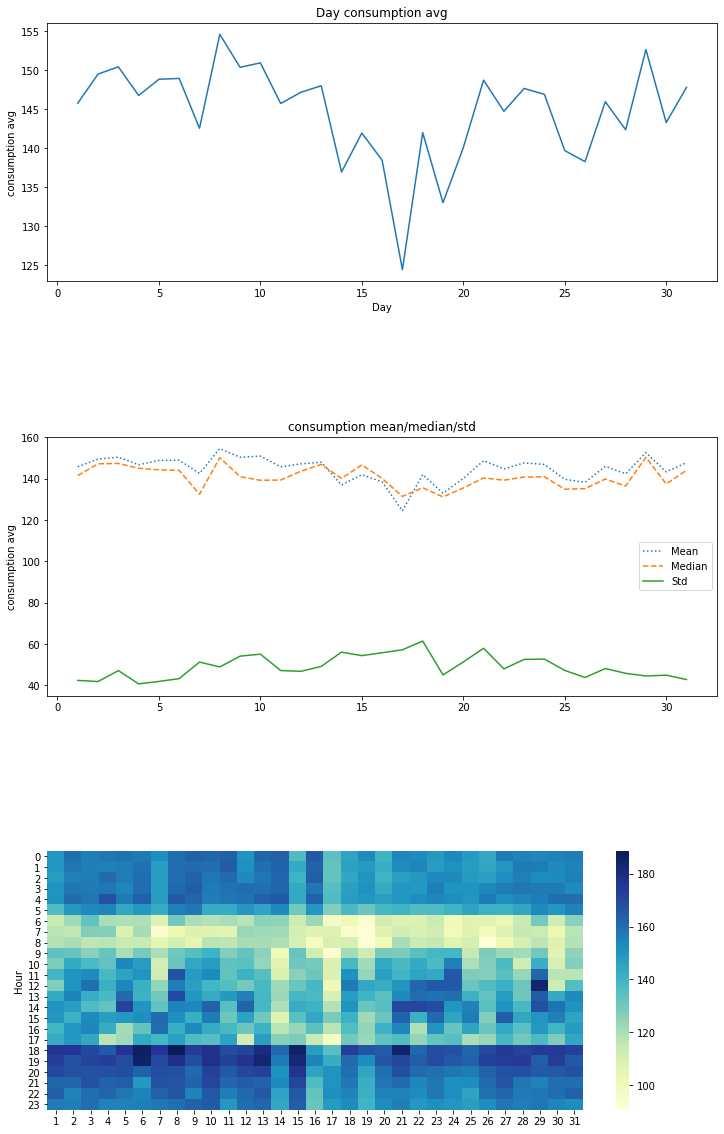

In [ ]:
## day
TSAggregationEda(df_5min_rhod, 'date', 'consumption', 'Day')

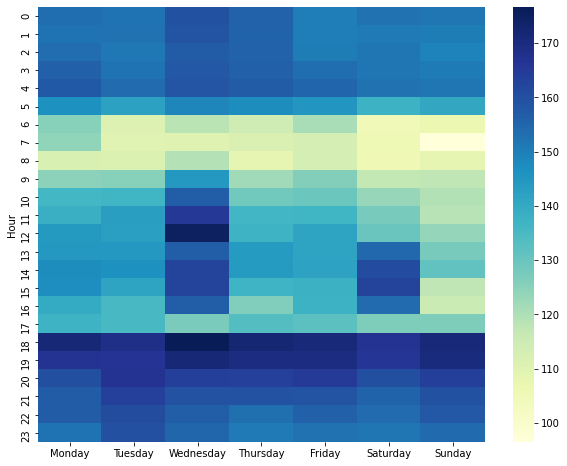

In [ ]:
heatmapGroupby(df_5min_rhod, 'date', 'consumption', 'Hour' , 'weekday_name', np.mean)

## EDA OF NeedEnergy API Hourly for Puma Rhodesville

In [ ]:
df_h_rhod.head(3)

,date,timestamp,consumption,solar,alwaysOn,gridImport,gridExport,selfConsumption,selfSufficiency,active,reactive,voltages,phaseVoltages,currentHarmonics,voltageHarmonics
0,2020-03-12 16:00:00,1584021600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[569.9, 3.3, 311.3, 123.3, 0.0, 0.0, 0.0, 0.0,...","[85.4, 4.5, 79.9, 24.5, 0.0, 0.0, 0.1, 0.0, 2....","[189.6, None, None]","[189.6, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
1,2020-03-12 17:00:00,1584025200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, None, 940.2, 232.8, 0.0, 0.0, 0.0, 0.0, ...","[0.2, None, 741.5, 45.6, 0.0, 0.0, 0.0, 0.0, 5...","[214.0, None, None]","[214.0, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
2,2020-03-12 18:00:00,1584028800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[None, None, 269.5, 59.8, 0.0, 0.0, 0.0, 0.0, ...","[None, None, 234.2, 13.5, 0.0, 0.0, 0.0, 0.0, ...","[223.8, None, None]","[223.8, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."


In [ ]:
info_data(df_h_rhod, info = True, head = False, shape = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5947 entries, 0 to 5946
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              5947 non-null   object 
 1   timestamp         5947 non-null   int64  
 2   consumption       5947 non-null   float64
 3   solar             5947 non-null   float64
 4   alwaysOn          5947 non-null   float64
 5   gridImport        5947 non-null   float64
 6   gridExport        5947 non-null   float64
 7   selfConsumption   5947 non-null   float64
 8   selfSufficiency   5947 non-null   float64
 9   active            5947 non-null   object 
 10  reactive          5947 non-null   object 
 11  voltages          5947 non-null   object 
 12  phaseVoltages     5947 non-null   object 
 13  currentHarmonics  5947 non-null   object 
 14  voltageHarmonics  5947 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 697.0+ KB
------------------------------

In [ ]:
df_h_rhod.nunique()

date                5947
timestamp           5947
consumption         5863
solar               5836
alwaysOn             500
gridImport          5781
gridExport             2
selfConsumption        2
selfSufficiency     3095
active              5947
reactive            5947
voltages             353
phaseVoltages        353
currentHarmonics       1
voltageHarmonics       1
dtype: int64

In [ ]:
describe(df_h_rhod)

,timestamp,consumption,solar,alwaysOn,gridImport,gridExport,selfConsumption,selfSufficiency
count,5.947000e+03,5947.000000,5947.000000,5947.000000,5947.000000,5.947000e+03,5947.000000,5947.000000
mean,1.599119e+12,1701.907341,518.761316,439.318483,1183.144505,5.044560e-07,98.099882,30.493062
std,7.932906e+09,547.601258,262.820277,283.942951,468.792086,2.245632e-05,13.654035,14.368462
min,1.584022e+12,0.000000,-764.683000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.592768e+12,1398.068000,314.767000,277.186000,987.382000,0.000000e+00,100.000000,21.735000
median,1.598123e+12,1701.927000,536.302000,359.958000,1134.214000,0.000000e+00,100.000000,32.150000
75%,1.605955e+12,1963.500000,667.510000,548.423000,1332.188000,0.000000e+00,100.000000,37.780000
max,1.613052e+12,4940.851000,2123.544000,1508.367000,4466.165000,1.000000e-03,100.000000,100.000000


Something wrong is going on here. The consumption go from 0 to 4940 Wh with a mean of 1701 Wh, why is so different from the 5mins?

['consumption']

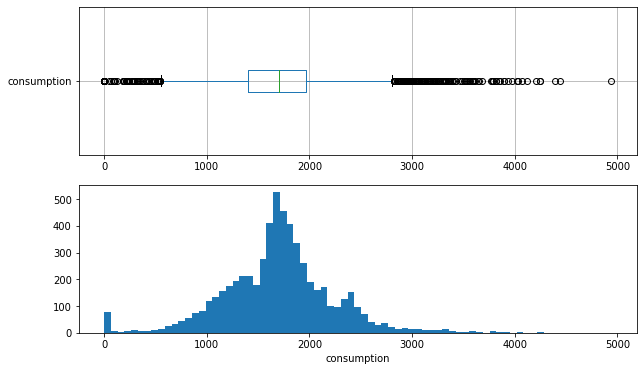

In [ ]:
boxHist(df_h_rhod, 'consumption')

In [ ]:
## convert date to datetime and create date attribute
df_h_rhod = date_cols(df_h_rhod, 'date')

In [ ]:
print(f'This data is for {df_h_rhod.Year.max() - df_h_rhod.Year.min()} year')

This data is for 1 year


In [ ]:
valCount(df_h_rhod, 'Month', perc = False)

7     744
8     743
6     700
9     612
1     603
11    581
12    554
5     543
4     261
2     224
3     201
10    181
Name: Month, dtype: int64

In [ ]:
valCount(df_h_rhod, 'weekday_name', perc = False)

Tuesday      886
Wednesday    867
Saturday     851
Friday       844
Monday       834
Sunday       833
Thursday     832
Name: weekday_name, dtype: int64

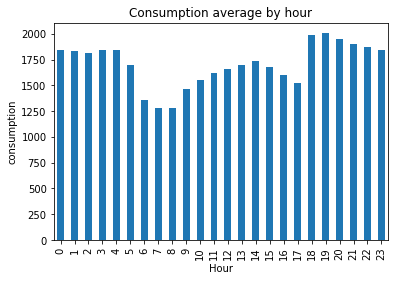

In [ ]:
## Average consumption by Hour
plots(df_h_rhod, 'Hour' , 'consumption', np.mean, 'Consumption average by hour', t = 'bar')

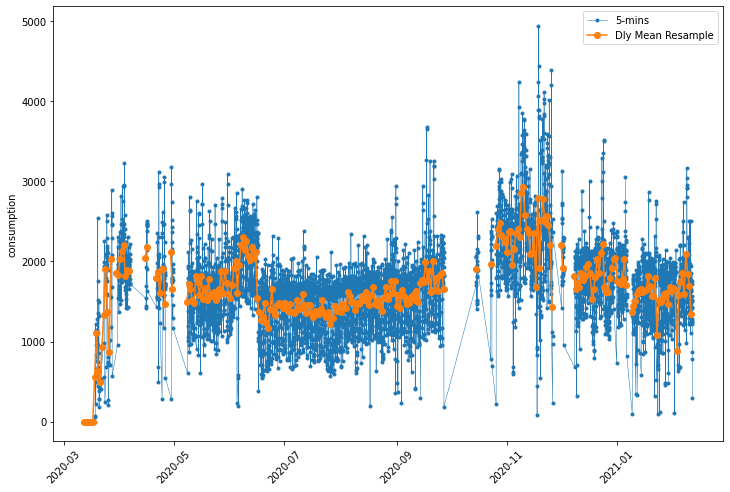

In [ ]:
DataandResampling(df_h_rhod, 'date', 'consumption', 'D', '5-mins')

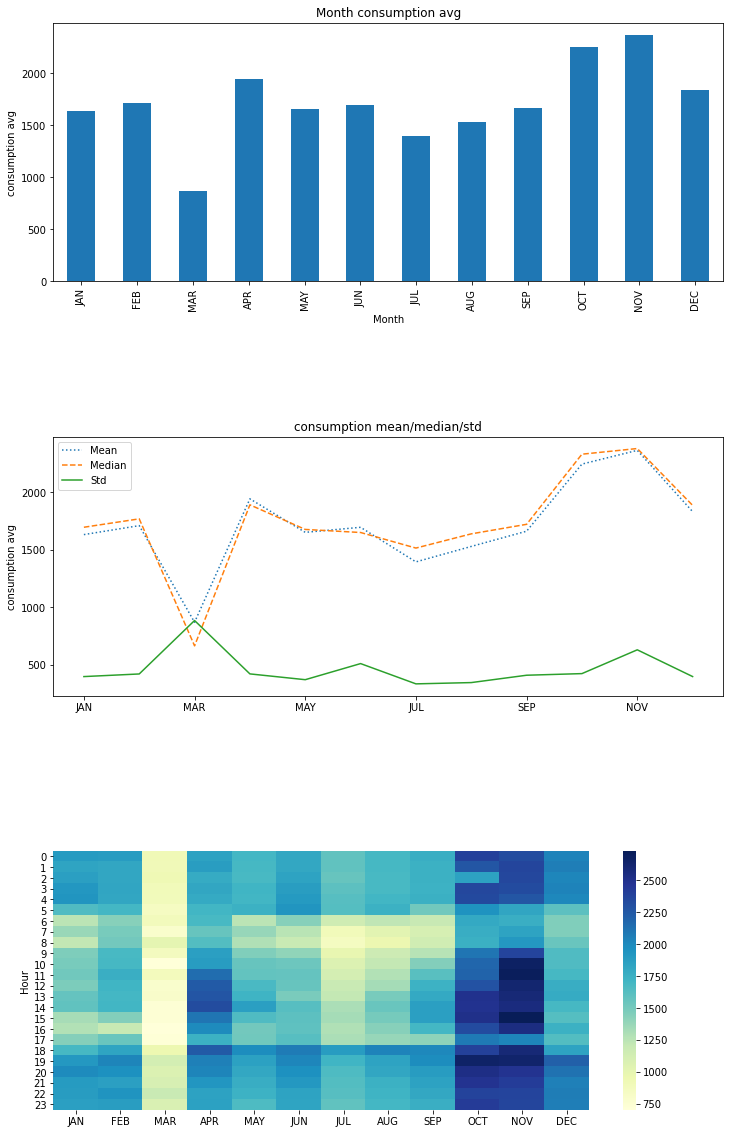

In [ ]:
## Month
TSAggregationEda(df_h_rhod, 'date', 'consumption', 'Month')

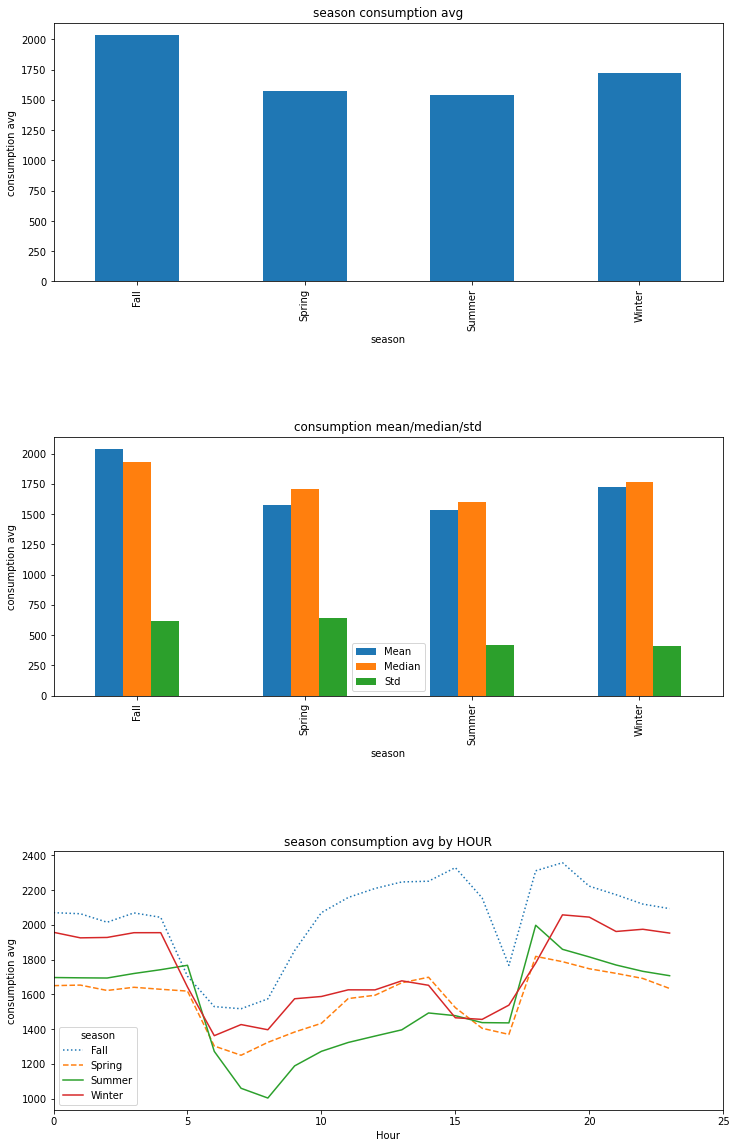

In [ ]:
## season
TSAggregationEda(df_h_rhod, 'date', 'consumption', 'season')

Same as before, high consumption on Fall

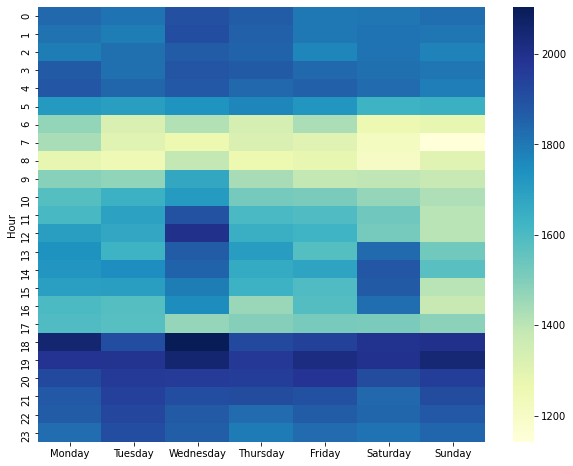

In [ ]:
heatmapGroupby(df_h_rhod, 'date', 'consumption', 'Hour' , 'weekday_name', np.mean)

Same pattern as for 5min. High consumption during the night

## EDA OF NeedEnergy API Monthly for Puma Rhodesville (Done Before 13/02)

In [ ]:
df_m_rhod.head()

,timestamp,consumption,solar,alwaysOn,gridImport,gridExport,selfConsumption,selfSufficiency,active,reactive,voltages,phaseVoltages,currentHarmonics,voltageHarmonics
0,1588284000000,897035.340,240179.530,228614.995,656854.609,0.0,100.0,26.77,"[None, None, 342626.8, 100337.8, -6.0, None, N...","[None, None, 237862.5, 21309.0, 0.2, None, Non...","[221.5, None, None]","[221.5, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
1,1590962400000,1187179.113,289643.679,280924.091,897537.134,0.0,100.0,24.40,"[None, None, 483264.9, 136180.0, -10.1, None, ...","[None, None, 324546.5, 27774.8, 0.4, None, Non...","[223.0, None, None]","[223.0, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
2,1593554400000,1037765.626,309822.192,276387.458,727947.133,0.0,100.0,29.85,"[None, None, 294813.5, 163333.1, -5.3, None, N...","[None, None, 263001.8, 31879.9, 0.0, None, Non...","[220.9, None, None]","[220.9, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
3,1596232800000,1136284.116,351634.591,330618.790,784647.924,0.0,100.0,30.95,"[None, None, 338646.3, 163788.7, -6.9, None, N...","[None, None, 309116.3, 31761.4, 0.0, None, Non...","[224.4, None, None]","[224.4, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
4,1598911200000,1017144.707,351527.045,244030.154,665617.762,0.0,100.0,34.56,"[None, None, 323318.5, 129750.7, -3.3, None, N...","[None, None, 273014.8, 25254.4, 0.0, None, Non...","[225.9, None, None]","[225.9, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."


In [ ]:
info_data(df_m_rhod, info = True, head = False, shape = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         10 non-null     int64  
 1   consumption       10 non-null     float64
 2   solar             10 non-null     float64
 3   alwaysOn          10 non-null     float64
 4   gridImport        10 non-null     float64
 5   gridExport        10 non-null     float64
 6   selfConsumption   10 non-null     float64
 7   selfSufficiency   10 non-null     float64
 8   active            10 non-null     object 
 9   reactive          10 non-null     object 
 10  voltages          10 non-null     object 
 11  phaseVoltages     10 non-null     object 
 12  currentHarmonics  10 non-null     object 
 13  voltageHarmonics  10 non-null     object 
dtypes: float64(7), int64(1), object(6)
memory usage: 1.2+ KB
--------------------------------------------------------------------
First rows
----

## EDA OF NeedEnergy API 5 min for Puma Rhodesville

In [ ]:
df_5m_rhod = pd.read_csv(zf.open(listfiles[-2]))

In [ ]:
info_data(df_5m_rhod, info = True, head = False, shape = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67296 entries, 0 to 67295
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         67296 non-null  int64  
 1   consumption       67296 non-null  float64
 2   solar             67296 non-null  float64
 3   alwaysOn          67296 non-null  float64
 4   gridImport        67296 non-null  float64
 5   gridExport        67296 non-null  float64
 6   selfConsumption   67296 non-null  float64
 7   selfSufficiency   67296 non-null  float64
 8   active            67296 non-null  object 
 9   reactive          67296 non-null  object 
 10  voltages          67296 non-null  object 
 11  lineVoltages      67296 non-null  object 
 12  phaseVoltages     67296 non-null  object 
 13  current           67296 non-null  object 
 14  currentHarmonics  67296 non-null  object 
 15  voltageHarmonics  67296 non-null  object 
dtypes: float64(7), int64(1), object(8)
memor

In [ ]:
df_5m_rhod.head()

,timestamp,consumption,solar,alwaysOn,gridImport,gridExport,selfConsumption,selfSufficiency,active,reactive,voltages,lineVoltages,phaseVoltages,current,currentHarmonics,voltageHarmonics
0,1585699200000,162.784,46.917,200.364,115.866,0.0,100.0,28.82,"[None, None, 53.6, 14.5, 0.0, None, None, None...","[None, None, 44.9, 2.7, 0.0, None, None, None,...","[204.5, None, None]","[204.5, None, None]","[204.5, None, None]","[None, None, 4.1, 0.9, 0.0, None, None, None, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
1,1585699500000,140.291,46.314,200.364,93.976,0.0,100.0,33.01,"[None, None, 31.8, 14.5, 0.0, None, None, None...","[None, None, 24.5, 2.8, 0.0, None, None, None,...","[208.2, None, None]","[208.2, None, None]","[208.2, None, None]","[None, None, 2.3, 0.8, 0.0, None, None, None, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
2,1585699800000,128.075,46.917,200.364,81.157,0.0,100.0,36.63,"[None, None, 12.7, 14.5, 0.0, None, None, None...","[None, None, 6.5, 3.1, 0.0, None, None, None, ...","[220.6, None, None]","[220.6, None, None]","[220.6, None, None]","[None, None, 0.8, 0.8, 0.0, None, None, None, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
3,1585700100000,131.197,46.888,200.364,84.309,0.0,100.0,35.74,"[None, None, 12.4, 14.5, 0.0, None, None, None...","[None, None, 6.3, 3.0, 0.0, None, None, None, ...","[216.7, None, None]","[216.7, None, None]","[216.7, None, None]","[None, None, 0.8, 0.8, 0.0, None, None, None, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
4,1585700400000,130.784,47.062,200.364,83.721,0.0,100.0,35.99,"[None, None, 12.2, 14.5, 0.0, None, None, None...","[None, None, 6.1, 2.9, 0.0, None, None, None, ...","[213.5, None, None]","[213.5, None, None]","[213.5, None, None]","[None, None, 0.8, 0.8, 0.0, None, None, None, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."


In [ ]:
missing_val(df_5m_rhod)

voltageHarmonics    0.0
currentHarmonics    0.0
current             0.0
phaseVoltages       0.0
lineVoltages        0.0
voltages            0.0
reactive            0.0
active              0.0
selfSufficiency     0.0
selfConsumption     0.0
gridExport          0.0
gridImport          0.0
alwaysOn            0.0
solar               0.0
consumption         0.0
timestamp           0.0
dtype: float64

In [ ]:
describe(df_5m_rhod)

,timestamp,consumption,solar,alwaysOn,gridImport,gridExport,selfConsumption,selfSufficiency
count,6.729600e+04,67296.000000,67296.00000,67296.000000,67296.000000,6.729600e+04,67296.000000,67296.000000
mean,1.599429e+12,146.199406,44.85237,454.387965,101.346503,2.971945e-07,99.729553,31.262756
std,7.474713e+09,47.733108,22.50477,281.043150,43.073013,1.723690e-05,5.193453,14.363972
min,1.585699e+12,11.552000,-37.97000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.593251e+12,118.586750,26.42525,286.368000,75.780750,0.000000e+00,100.000000,22.040000
median,1.598310e+12,140.677000,45.02000,364.548000,93.363000,0.000000e+00,100.000000,31.610000
75%,1.605906e+12,175.436000,55.93750,551.988000,122.413000,0.000000e+00,100.000000,39.270000
max,1.612828e+12,465.607000,343.13900,1508.004000,428.802000,1.000000e-03,100.000000,100.000000


['consumption']

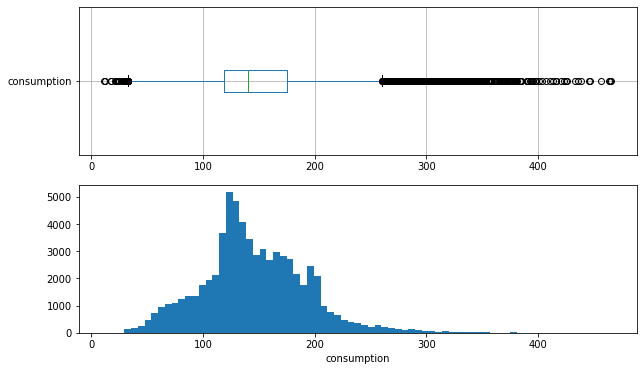

In [ ]:
boxHist(df_5m_rhod, 'consumption')

['alwaysOn']

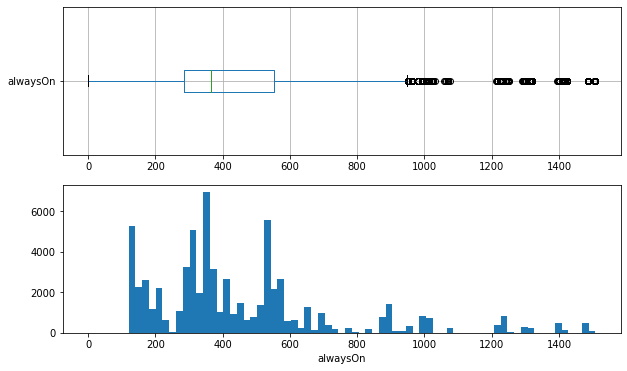

In [ ]:
boxHist(df_5m_rhod, 'alwaysOn')

In [ ]:
df_5m_rhod['Date'] = pd.to_datetime(df_5m_rhod['timestamp'], unit='ms')

In [ ]:
df_5m_rhod.head(2)

,timestamp,consumption,solar,alwaysOn,gridImport,gridExport,selfConsumption,selfSufficiency,active,reactive,voltages,lineVoltages,phaseVoltages,current,currentHarmonics,voltageHarmonics,Date
0,1585699200000,162.784,46.917,200.364,115.866,0.0,100.0,28.82,"[None, None, 53.6, 14.5, 0.0, None, None, None...","[None, None, 44.9, 2.7, 0.0, None, None, None,...","[204.5, None, None]","[204.5, None, None]","[204.5, None, None]","[None, None, 4.1, 0.9, 0.0, None, None, None, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...",2020-04-01 00:00:00
1,1585699500000,140.291,46.314,200.364,93.976,0.0,100.0,33.01,"[None, None, 31.8, 14.5, 0.0, None, None, None...","[None, None, 24.5, 2.8, 0.0, None, None, None,...","[208.2, None, None]","[208.2, None, None]","[208.2, None, None]","[None, None, 2.3, 0.8, 0.0, None, None, None, ...","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...",2020-04-01 00:05:00


In [ ]:
## convert date to datetime and c
df_5m_rhod = date_cols(df_5m_rhod, 'Date')

In [ ]:
df_5m_rhod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67296 entries, 0 to 67295
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         67296 non-null  int64         
 1   consumption       67296 non-null  float64       
 2   solar             67296 non-null  float64       
 3   alwaysOn          67296 non-null  float64       
 4   gridImport        67296 non-null  float64       
 5   gridExport        67296 non-null  float64       
 6   selfConsumption   67296 non-null  float64       
 7   selfSufficiency   67296 non-null  float64       
 8   active            67296 non-null  object        
 9   reactive          67296 non-null  object        
 10  voltages          67296 non-null  object        
 11  lineVoltages      67296 non-null  object        
 12  phaseVoltages     67296 non-null  object        
 13  current           67296 non-null  object        
 14  currentHarmonics  6729

In [ ]:
df_5m_rhod.iloc[:, 16:22].head()

,Date,Year,Month,Day,weekday,Hour
0,2020-04-01 00:00:00,2020,4,1,2,0
1,2020-04-01 00:05:00,2020,4,1,2,0
2,2020-04-01 00:10:00,2020,4,1,2,0
3,2020-04-01 00:15:00,2020,4,1,2,0
4,2020-04-01 00:20:00,2020,4,1,2,0


In [ ]:
print(f'This data is for {df_5m_rhod.Year.max() - df_5m_rhod.Year.min()} year')

This data is for 1 year


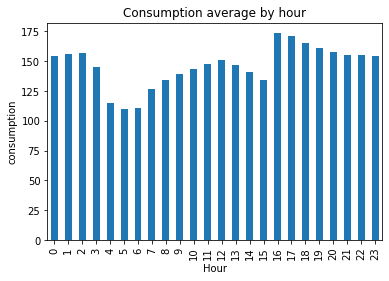

In [ ]:
## Average consumption by Hour
plots(df_5m_rhod, 'Hour' , 'consumption', np.mean, 'Consumption average by hour', t = 'bar')

In [ ]:
df_5m_rhod["Month_name"] = df_5m_rhod["Month"].map({1:"JAN", 2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",
                                    7:"JUL",8:"AUG",9:"SEP",10:"OCT",11:"NOV",12:"DEC"
                                               })
df_5m_rhod["weekday_name"] = df_5m_rhod["weekday"].map({0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'
                                               })

In [ ]:
valCount(df_5m_rhod, 'Month_name', perc = False)

JUL    8928
AUG    8876
JUN    8344
SEP    7239
JAN    6958
NOV    6834
DEC    6578
MAY    6487
APR    3028
OCT    2163
FEB    1861
Name: Month_name, dtype: int64

In [ ]:
valCount(df_5m_rhod, 'weekday_name', perc = False)

Sat      9970
Fri      9677
Wed      9634
Sun      9620
Mon      9579
Tues     9508
Thurs    9308
Name: weekday_name, dtype: int64

In [ ]:
df_5m_rhod.Date.max(), df_5m_rhod.Date.min()

(Timestamp('2021-02-08 23:55:00'), Timestamp('2020-04-01 00:00:00'))

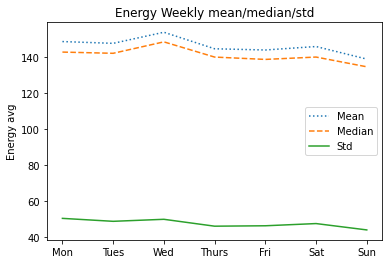

In [ ]:
### Mean, median and std of each week
order_week = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
df_5m_rhod.groupby('weekday_name').agg({'consumption': ['mean', 'median', 'std']}).reindex(index = order_week).plot(style=[':', '--', '-'])
plt.title('Energy Weekly mean/median/std')
plt.xlabel('')
plt.ylabel('Energy avg')

plt.legend(loc = "best", labels = ['Mean', 'Median', 'Std']);

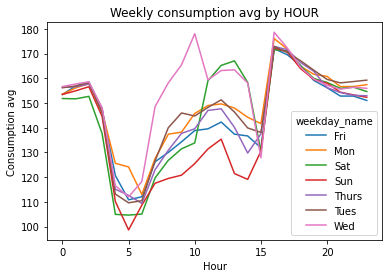

In [ ]:
### Weekly Energy by HOUR
df_5m_rhod.groupby(['Hour', 'weekday_name'])['consumption'].mean().unstack().plot()
plt.title('Weekly consumption avg by HOUR')
plt.ylabel('Consumption avg');

In [ ]:
df_h = df_5m_rhod.groupby(['Hour', 'weekday_name'])['consumption'].mean().unstack()

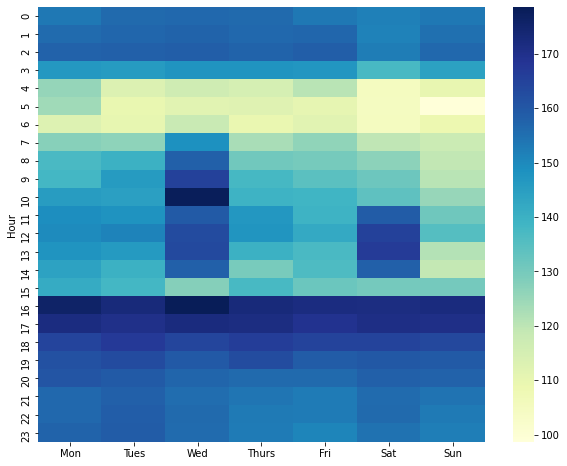

In [ ]:
df_h = df_h[order_week]
#df_hour.index.name 
df_h.columns.name = None
plt.figure(figsize=(10, 8))
sns.heatmap(df_h, cmap="YlGnBu");
#df_hour.head()

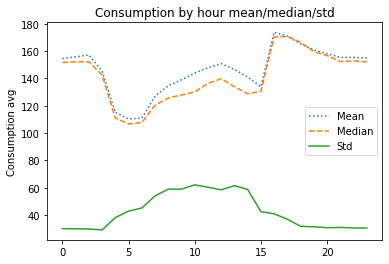

In [ ]:
df_5m_rhod.groupby('Hour').agg({'consumption': ['mean', 'median', 'std']}).plot(style=[':', '--', '-'])
plt.title('Consumption by hour mean/median/std')
plt.xlabel('')
plt.ylabel('Consumption avg')

plt.legend(loc = "best", labels = ['Mean', 'Median', 'Std']);

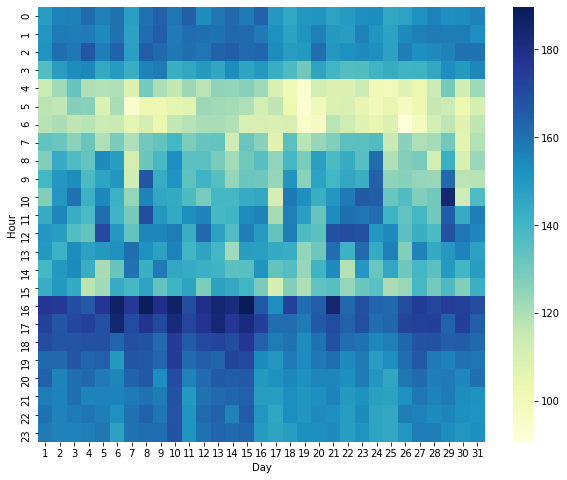

In [ ]:
df_h1 = df_5m_rhod.groupby(['Hour', 'Day'])['consumption'].mean().unstack()
#df_hour.index.name 
#df_h1.columns.name = None
plt.figure(figsize=(10, 8))
sns.heatmap(df_h1, cmap="YlGnBu");

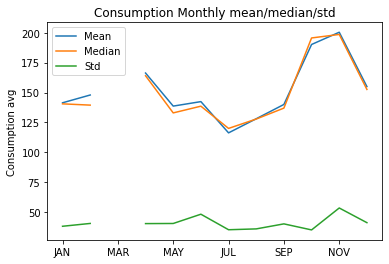

In [ ]:
### Mean, median and std of each month
order_month = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
df_5m_rhod.groupby('Month_name').agg({'consumption': ['mean', 'median', 'std']}).reindex(index = order_month).plot()
plt.title('Consumption Monthly mean/median/std')
plt.xlabel('')
plt.ylabel('Consumption avg')

plt.legend(loc = "best", labels = ['Mean', 'Median', 'Std']);

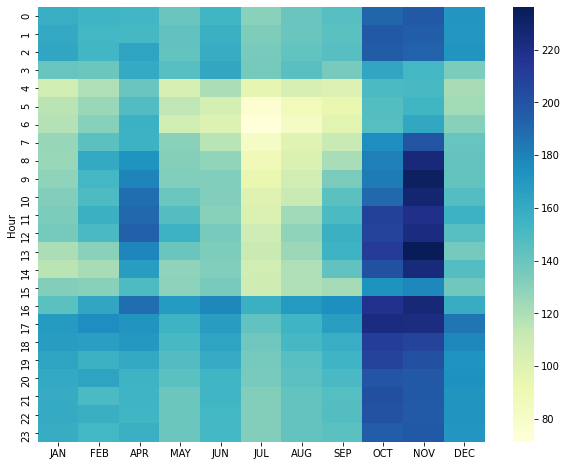

In [ ]:
plt.figure(figsize=(10, 8))

order_month = ['JAN', 'FEB', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
df_mh = df_5m_rhod.groupby(['Hour', 'Month_name'])['consumption'].mean().unstack()
df_mh = df_mh[order_month]
df_mh.columns.name = None
sns.heatmap(df_mh, cmap="YlGnBu");